# Toxic Comments Classification

### Provided with a large number of comments which have been labeled in 6 different classes for toxic behavior. The types of toxicity are as follows: 

- toxic

- severe_toxic

- threat 

- insult 

- identity_hate 

## Goals: 

Build a nonrecurrent model as a baseline (CNN) 

Build several (at least two) different recurrent neural networks (RNN) and compare their performance using a held-out validation set 

### Recurrent Models for Further Data Testing:
- pretrained word embeddings
- LSTM vs. GRU vs. basic RNN
- Bidirectional RNNs
- 1-D convolution

### Author: Andrea Murphy
Spring 2020

## Preprocess and Imports

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer

### Read files and define the data for training and testing 

In [2]:
train = pd.read_csv(os.path.join('train.csv'))
test = pd.read_csv(os.path.join('test.csv'))

In [3]:
print(train.shape)
print(test.shape)

(159571, 8)
(153164, 2)


In [4]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [6]:
train_labels = train.iloc[:, 2:].values
train_texts = train['comment_text']
test_texts = test['comment_text']

## We start by using a Text Tokenizer on the training data 

A Text Tokenizers is a Keras utility class that allows for vectorizing of text.  


In [7]:
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(train_texts)

In [8]:
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

In [9]:
train_sequences[:2]

[[688,
  75,
  1,
  126,
  130,
  177,
  29,
  672,
  4511,
  12052,
  1116,
  86,
  331,
  51,
  2278,
  11448,
  50,
  6864,
  15,
  60,
  2756,
  148,
  7,
  2937,
  34,
  117,
  1221,
  15190,
  2825,
  4,
  45,
  59,
  244,
  1,
  365,
  31,
  1,
  38,
  27,
  143,
  73,
  3462,
  89,
  3085,
  4583,
  2273,
  985],
 [52,
  2635,
  13,
  555,
  3809,
  73,
  4556,
  2706,
  21,
  94,
  38,
  803,
  2679,
  992,
  589,
  8377,
  182]]

## Historgram of the Train Sequences 

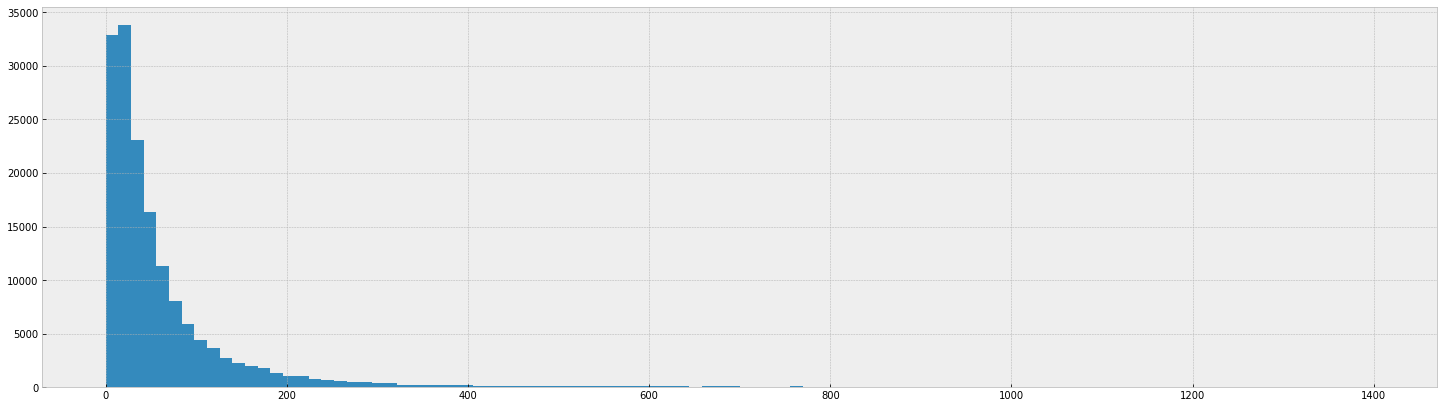

In [10]:
plt.figure(figsize=(25,7))
plt.style.use('bmh')
lengths = [len(seq) for seq in train_sequences]
plt.hist(lengths, bins=100);

In [11]:
maxlen=200
train_sequences = pad_sequences(train_sequences, maxlen=maxlen)
test_sequences = pad_sequences(test_sequences, maxlen=maxlen)

In [12]:
train_sequences[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

## Constructing Model

In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import layers
from keras import models

Using TensorFlow backend.


In [14]:
model = Sequential()
model.add(Embedding(20000, 200))
model.add(LSTM(200, dropout=0.2, recurrent_dropout=0.2))
# 6== for the 6 classes
model.add(Dense(6, activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [15]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
from tensorflow.keras.utils import plot_model

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 200)         4000000   
_________________________________________________________________
lstm (LSTM)                  (None, 200)               320800    
_________________________________________________________________
dense (Dense)                (None, 6)                 1206      
Total params: 4,322,006
Trainable params: 4,322,006
Non-trainable params: 0
_________________________________________________________________


## Fit the Model

In [18]:
early = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
reduce = ReduceLROnPlateau(monitor='val_loss', patience=1, verbose=1)

history = model.fit(train_sequences, train_labels,
                    validation_split=0.2, epochs=10,
                    batch_size=256,
                    callbacks=[early, reduce])

Train on 127656 samples, validate on 31915 samples
Epoch 1/10
127656/127656 [==============================] - 850s 7ms/sample - loss: 0.0828 - acc: 0.9743 - val_loss: 0.0551 - val_acc: 0.9811
Epoch 2/10
127656/127656 [==============================] - 887s 7ms/sample - loss: 0.0492 - acc: 0.9823 - val_loss: 0.0485 - val_acc: 0.9825
Epoch 3/10
127656/127656 [==============================] - 908s 7ms/sample - loss: 0.0460 - acc: 0.9830 - val_loss: 0.0474 - val_acc: 0.9828
Epoch 4/10
127656/127656 [==============================] - 911s 7ms/sample - loss: 0.0437 - acc: 0.9836 - val_loss: 0.0470 - val_acc: 0.9831
Epoch 5/10
127656/127656 [==============================] - 983s 8ms/sample - loss: 0.0421 - acc: 0.9841 - val_loss: 0.0465 - val_acc: 0.9833
Epoch 6/10
127656/127656 [==============================] - 884s 7ms/sample - loss: 0.0402 - acc: 0.9847 - val_loss: 0.0457 - val_acc: 0.9832
Epoch 7/10
127488/127656 [============================>.] - ETA: 1s - loss: 0.0386 - acc: 0.9852


In [19]:
def plot_training_curves(history):
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].plot(history.history['loss'], label='train loss')
    ax[0].plot(history.history['val_loss'], label='val loss')
    ax[0].legend()
    ax[1].plot(history.history['acc'], label='train acc')
    ax[1].plot(history.history['val_acc'], label='val acc')
    ax[1].legend()

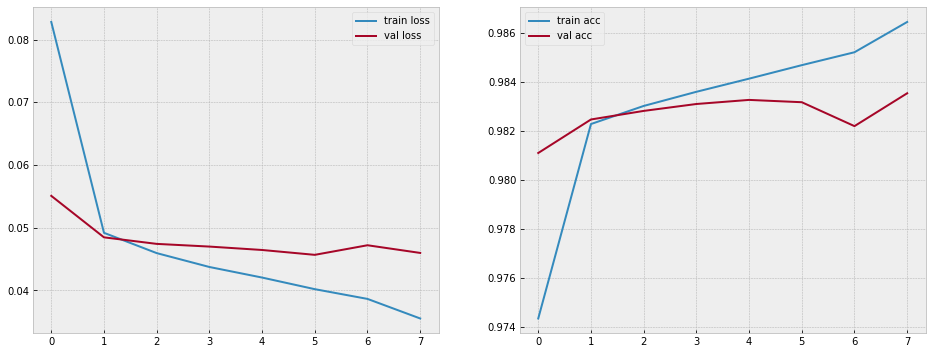

In [20]:
plot_training_curves(history)

## Evaluate  

In [21]:
from sklearn.metrics import roc_auc_score

num_preds = 1000
preds = model.predict(test_sequences[:num_preds,...])

### -1 == test data with no labels

In [22]:
test_labels = pd.read_csv('test_labels.csv')
test_labels.loc[:1000,:]

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...
996,01a9ebf72533595b,0,0,0,0,0,0
997,01aa8fb1bff7e5cd,0,0,0,0,0,0
998,01aafd548fe45134,-1,-1,-1,-1,-1,-1
999,01ab45c9c7ab52fe,-1,-1,-1,-1,-1,-1


In [23]:
idx = [x for x in test_labels.index[:num_preds] if not -1 in test_labels.loc[x, :].values]

In [24]:
idx

[5,
 7,
 11,
 13,
 14,
 16,
 17,
 19,
 21,
 22,
 23,
 26,
 28,
 29,
 31,
 33,
 34,
 38,
 40,
 41,
 43,
 45,
 46,
 47,
 48,
 49,
 51,
 56,
 58,
 59,
 60,
 62,
 65,
 68,
 69,
 72,
 73,
 75,
 76,
 79,
 81,
 87,
 89,
 93,
 94,
 95,
 97,
 98,
 100,
 105,
 106,
 108,
 110,
 116,
 119,
 120,
 121,
 124,
 125,
 127,
 128,
 131,
 142,
 144,
 145,
 146,
 154,
 159,
 160,
 161,
 164,
 167,
 171,
 172,
 176,
 181,
 184,
 191,
 192,
 194,
 200,
 202,
 203,
 204,
 209,
 210,
 212,
 215,
 216,
 219,
 220,
 221,
 224,
 225,
 229,
 230,
 233,
 241,
 244,
 246,
 248,
 250,
 252,
 253,
 254,
 255,
 258,
 259,
 260,
 264,
 265,
 266,
 269,
 272,
 275,
 276,
 280,
 282,
 283,
 286,
 289,
 291,
 294,
 300,
 302,
 305,
 307,
 313,
 321,
 323,
 325,
 326,
 328,
 333,
 342,
 344,
 345,
 348,
 349,
 352,
 353,
 354,
 356,
 358,
 359,
 361,
 363,
 365,
 370,
 371,
 372,
 375,
 376,
 377,
 379,
 383,
 387,
 392,
 394,
 395,
 396,
 398,
 402,
 403,
 404,
 406,
 407,
 408,
 409,
 410,
 411,
 414,
 416,
 418,
 420,


In [25]:
# get predictions for only labeled test data
valid_preds = preds[idx,...]

# get labels only for labeled test data
valid_labels = test_labels.loc[idx,:]

In [26]:
preds

array([[9.9798357e-01, 4.4201306e-01, 9.8651010e-01, 1.4800259e-01,
        9.5418882e-01, 1.9364432e-01],
       [1.4904141e-04, 3.8743019e-07, 3.0785799e-05, 3.8743019e-07,
        9.0897083e-06, 4.0531158e-06],
       [2.8759241e-04, 1.4007092e-06, 1.6617775e-04, 1.5199184e-06,
        4.8696995e-05, 1.0311604e-05],
       ...,
       [6.6944748e-02, 4.6342611e-05, 1.3685822e-03, 2.3794174e-04,
        3.0812919e-03, 1.6503632e-03],
       [2.9624701e-03, 1.5616417e-05, 3.9964914e-04, 3.3825636e-05,
        2.6822090e-04, 1.2847781e-04],
       [3.8708746e-01, 5.5915117e-04, 2.3317218e-02, 1.7018020e-03,
        3.7309289e-02, 1.1041403e-02]], dtype=float32)

In [27]:
# convert to binary -can pick a differnt threshold if you want 
preds[preds >= 0.5] = 1
preds[preds < 1] = 0

In [28]:
preds

array([[1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]], dtype=float32)

In [29]:
avg_auc = 0.
for i in range(6):
    avg_auc += roc_auc_score(valid_labels.iloc[:, i + 1], valid_preds[:, i])
avg_auc /= 6
print(avg_auc)

0.9816377066441229


# GloVe and Keras implementation

### Implemented with: 
- pretrained word embeddings
- GRU
- Bidirectional RNNs
- 1-D convolution

GloVe: Global Vectors for Word Representation- https://nlp.stanford.edu/pubs/glove.pdf

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as pylab
import seaborn as sns

import re
import keras

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, GRU
from keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, GlobalAveragePooling1D, concatenate
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.callbacks import CSVLogger, ReduceLROnPlateau, ModelCheckpoint 
from keras.models import Sequential

Using TensorFlow backend.


### Import pretrained word embeddings from GloVe 

In [2]:
train_df = pd.read_csv('train2.csv')
test_df = pd.read_csv('test2.csv')

glove_path = 'glove.6B.300d.txt'

### target_columns == 6 different classes for toxic behavior

In [3]:
target_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [4]:
train_df.describe(include='all')

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571,159571,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
unique,159571,159571,NaN,NaN,NaN,NaN,NaN,NaN
top,1d05319c431f57a0,Stanley Cup Playoffs\n\nThe East Conference is...,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,NaN,NaN,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Check to see if there are Null Values within the datasets

In [5]:
print(pd.isnull(train_df).sum())

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


## Clean the data by removing the special characters in the comments

In [6]:
for dataset in [train_df, test_df]:
    dataset['comment_text'] = dataset['comment_text'].apply(lambda x: re.sub('[\(\)\"\t_\n.,:=!@#$%^&*-/[\]?|1234567890—]', ' ', x).strip())

## Define Y and Parameters 

In [7]:
Y = train_df[target_columns]

max_features = 20000
max_length = 100
embed_size = 300
batch_size = 32
epochs = 10

## Tokenization 

In [8]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(train_df['comment_text'])

In [9]:
train_token = tokenizer.texts_to_sequences(train_df['comment_text'])
test_token = tokenizer.texts_to_sequences(test_df['comment_text'])

In [10]:
X_train = pad_sequences(train_token, maxlen=max_length)
x_test = pad_sequences(test_token, maxlen=max_length)

## Embedding Matrix

In [11]:
embedding_index = {}
with open(glove_path, encoding='utf8') as f:
    for line in f:
        values = line.rstrip().rsplit(' ')
        embedding_index[values[0]] = np.asarray(values[1:], dtype='float32')

word_index = tokenizer.word_index
num_words = min(max_features, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, embed_size))
for word, i in word_index.items():
    if i >= max_features:
        continue

    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

## Construct Model 

In [12]:
input = Input(shape=(max_length,))
x = Embedding(max_features, embed_size, weights=[embedding_matrix])(input)
x = Bidirectional(GRU(128, return_sequences=True, dropout=0.1,recurrent_dropout=0.1))(x)
x = Conv1D(64, kernel_size = 3, padding = "valid", activation="relu")(x)
x = concatenate([GlobalAveragePooling1D()(x), GlobalMaxPool1D()(x)])
x = Dense(6, activation="sigmoid")(x)

model = Model(input=input, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])











Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  


In [13]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 100, 300)     6000000     input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 100, 256)     329472      embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 98, 64)       49216       bidirectional_1[0][0]            
__________________________________________________________________________________________________
global_ave

## Fit Model

In [14]:
from keras.callbacks import EarlyStopping

early = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=1e-8)

history = model.fit(X_train, Y,
                    validation_split=0.2, 
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[early, reduce])



Train on 127656 samples, validate on 31915 samples
Epoch 1/10
127656/127656 [==============================] - 1055s 8ms/step - loss: 0.0527 - acc: 0.9810 - val_loss: 0.0466 - val_acc: 0.9823
Epoch 2/10
127656/127656 [==============================] - 1677s 13ms/step - loss: 0.0402 - acc: 0.9845 - val_loss: 0.0456 - val_acc: 0.9827
Epoch 3/10
127656/127656 [==============================] - 1031s 8ms/step - loss: 0.0328 - acc: 0.9873 - val_loss: 0.0519 - val_acc: 0.9825
Epoch 4/10
127656/127656 [==============================] - 1036s 8ms/step - loss: 0.0209 - acc: 0.9920 - val_loss: 0.0557 - val_acc: 0.9826
Epoch 00004: early stopping


## Assess Model 

In [17]:
from sklearn.metrics import roc_auc_score

num_preds = 1000
preds = model.predict(x_test[:num_preds,...])

In [18]:
test_labels = pd.read_csv('test_labels.csv')
test_labels.loc[:1000,:]

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...
996,01a9ebf72533595b,0,0,0,0,0,0
997,01aa8fb1bff7e5cd,0,0,0,0,0,0
998,01aafd548fe45134,-1,-1,-1,-1,-1,-1
999,01ab45c9c7ab52fe,-1,-1,-1,-1,-1,-1


In [19]:
idx = [x for x in test_labels.index[:num_preds] if not -1 in test_labels.loc[x, :].values]

In [20]:
idx

[5,
 7,
 11,
 13,
 14,
 16,
 17,
 19,
 21,
 22,
 23,
 26,
 28,
 29,
 31,
 33,
 34,
 38,
 40,
 41,
 43,
 45,
 46,
 47,
 48,
 49,
 51,
 56,
 58,
 59,
 60,
 62,
 65,
 68,
 69,
 72,
 73,
 75,
 76,
 79,
 81,
 87,
 89,
 93,
 94,
 95,
 97,
 98,
 100,
 105,
 106,
 108,
 110,
 116,
 119,
 120,
 121,
 124,
 125,
 127,
 128,
 131,
 142,
 144,
 145,
 146,
 154,
 159,
 160,
 161,
 164,
 167,
 171,
 172,
 176,
 181,
 184,
 191,
 192,
 194,
 200,
 202,
 203,
 204,
 209,
 210,
 212,
 215,
 216,
 219,
 220,
 221,
 224,
 225,
 229,
 230,
 233,
 241,
 244,
 246,
 248,
 250,
 252,
 253,
 254,
 255,
 258,
 259,
 260,
 264,
 265,
 266,
 269,
 272,
 275,
 276,
 280,
 282,
 283,
 286,
 289,
 291,
 294,
 300,
 302,
 305,
 307,
 313,
 321,
 323,
 325,
 326,
 328,
 333,
 342,
 344,
 345,
 348,
 349,
 352,
 353,
 354,
 356,
 358,
 359,
 361,
 363,
 365,
 370,
 371,
 372,
 375,
 376,
 377,
 379,
 383,
 387,
 392,
 394,
 395,
 396,
 398,
 402,
 403,
 404,
 406,
 407,
 408,
 409,
 410,
 411,
 414,
 416,
 418,
 420,


In [21]:
# get predictions for only labeled test data
valid_preds = preds[idx,...]

# get labels only for labeled test data
valid_labels = test_labels.loc[idx,:]

In [22]:
preds

array([[9.9895322e-01, 2.3931971e-01, 9.9463367e-01, 3.1428099e-02,
        9.4199085e-01, 5.8864850e-01],
       [1.0728836e-06, 0.0000000e+00, 1.9967556e-06, 0.0000000e+00,
        8.9406967e-08, 5.9604645e-08],
       [2.2738576e-03, 1.9609928e-05, 6.5484643e-04, 1.7255545e-05,
        4.7767162e-04, 2.8565526e-04],
       ...,
       [4.2007267e-03, 1.3709068e-06, 1.0684431e-03, 2.9802322e-06,
        1.5676320e-03, 4.3153763e-05],
       [2.5331974e-06, 0.0000000e+00, 1.9371510e-06, 0.0000000e+00,
        2.9802322e-08, 0.0000000e+00],
       [3.2409787e-02, 1.0251999e-05, 4.8115849e-04, 1.2516975e-06,
        1.5471876e-03, 4.0680170e-05]], dtype=float32)

In [23]:
avg_auc = 0.
for i in range(6):
    avg_auc += roc_auc_score(valid_labels.iloc[:, i + 1], valid_preds[:, i])
avg_auc /= 6
print(avg_auc)

0.9798999321159095
